Lee Eisenberg & ShaoYang Li

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dfTrain = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')

I couldn't find any outliers from looking through the data, but I'll see if any become apparent after futher data manipulation.

C:\Users\antee\AppData\Local\Temp\ipykernel_59848\1284366677.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfEconomic['Fare'].replace(0, 1, inplace=True) #avoid divide by 0 in logarithm


Text(0.5, 1.0, 'Economic Correlation Heatmap')

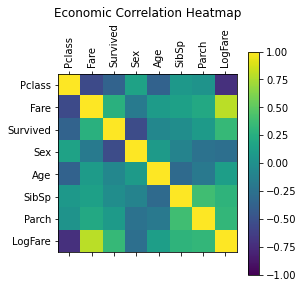

In [16]:
dfEconomic = dfTrain[['Pclass', 'Fare', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch']]
dfEconomic = dfEconomic.dropna() #just for now
dfEconomic['Fare'].replace(0, 1, inplace=True) #avoid divide by 0 in logarithm
dfEconomic['LogFare'] = np.log(dfEconomic['Fare'])

def genderInt(x):
    if x == 'male':
        return 1
    else:
        return 0

dfEconomic['Sex'] = dfEconomic['Sex'].apply(genderInt)
dfEconomic['Sex'] = pd.to_numeric(dfEconomic['Sex'])
dfEconomicPairwise = dfEconomic.corr(numeric_only=False) #pairwise correlation matrix
plt.matshow(dfEconomicPairwise, vmin = -1) #plot heatmap
plt.xticks(range(len(dfEconomicPairwise.columns)), dfEconomicPairwise.columns, rotation = 90)
plt.yticks(range(len(dfEconomicPairwise.columns)), dfEconomicPairwise.columns)
plt.colorbar()
plt.title('Economic Correlation Heatmap')